In [1]:
import pandas as pd
import re
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
trans_pairs = pd.read_csv('data/mt.translatedsentence_complete.csv')
trans_pairs.head()

,id,translatedSet,src,tgt
0,11492,Admin | Test Corpus Identity | Hindi -> English,"&quot; देखो बाला भैया , मुझे क्या मिला है , एक...",NaN
1,11491,Admin | Test Corpus Identity | Hindi -> English,&quot; प्रिया ने कहा,NaN
2,11490,Admin | Test Corpus Identity | Hindi -> English,"पमबरम नाम के लट्टू , के तो जैसे कान खड़े हो गये...",NaN
3,11489,Admin | Test Corpus Identity | Hindi -> English,अलमारी में सबसे नीचे पड़े - पड़े मैं बिलकुल उकता...,NaN
4,11488,Admin | Test Corpus Identity | Hindi -> English,&apos; बाला ने कपड़े से धूल में पड़े लट्टू को सा...,NaN


In [3]:
trans_pairs[trans_pairs['src'] == 'हैरान होकर मैंने अपने आसपास देखा']

,id,translatedSet,src,tgt
666,10826,Test User 301 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,NaN
1324,10168,Test User 801 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,I looked around with surprise .
1482,10010,Test User 1001 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,NaN
1736,9756,Test User 901 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me
1814,9640,Test User 701 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me
1855,9599,Test User 1101 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,Surprised I look around me .
2276,9104,Admin | Turtle Story MT L4 | Hindi -> English,हैरान होकर मैंने अपने आसपास देखा,NaN
2629,8696,Test User 401 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,"Surprised, I looked around myself."
2880,8445,Test User | Turtle Story PE L4 | Hindi -> English,हैरान होकर मैंने अपने आसपास देखा,"Astonished, I looked around myself."
3211,8110,Test User 601 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Suddenly i looked around myself


In [4]:
trans_pairs = trans_pairs.replace(np.nan, '', regex=True)
trans_pairs = trans_pairs[trans_pairs['translatedSet'].str.contains("Test User")]

In [5]:
def break_user(x):
    xs1 = x.split('|')
    
    if len(xs1) > 1:
        return xs1[0]
        
def breakdown_level(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-1]
    return ''

def breakdown_type(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-2]
    return ''

def breakdown_story(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return ' '.join(xs2[:-2])
    return ''

def breakdown_direction(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        return xs1[2].strip()

In [6]:
trans_pairs['user'] = trans_pairs['translatedSet'].apply(lambda x: break_user(x))
trans_pairs['type'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_type(x))
trans_pairs['level'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_level(x))
trans_pairs['story'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_story(x))
trans_pairs['direction'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_direction(x))

In [7]:
# from textblob import TextBlob

In [8]:
# enhi = trans_pairs[(trans_pairs['direction'] == 'English -> Hindi')]

In [9]:
# enhi[enhi['user'].str.contains('1101')]

In [10]:
# enhi[['user', 'type', 'tgt']].to_csv('./enhi.csv')

In [11]:
trans_pairs = trans_pairs[trans_pairs['type'] != '']
trans_pairs["spacy"] = trans_pairs["tgt"].apply(lambda x: nlp(x))

In [12]:
for index, row in trans_pairs.iterrows():
    src = row["src"]
    tgt = row["tgt"]
    if tgt == '':
        trans_pairs.at[index,'score'] = 0.0
    else:
        spacy_main = row["spacy"]
        collect = trans_pairs[trans_pairs['src'] == src]
        simi = 0.0
        count = 0
        for ind, ro in collect.iterrows():
            if ro['tgt'] != '':
                simi += spacy_main.similarity(ro["spacy"])
                count += 1
        if count > 0:
            trans_pairs.at[index,'score'] = (simi/count)
        else:
            trans_pairs.at[index,'score'] = simi

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

In [13]:
trans_pairs[trans_pairs['src'] == 'मेरी आँख खुली']

,id,translatedSet,src,tgt,user,type,level,story,direction,spacy,score
856,10636,Test User 301 | Under My Bed PE L2 | Hindi -> ...,मेरी आँख खुली,My eyes opened.,Test User 301,PE,L2,Under My Bed,Hindi -> English,"(My, eyes, opened, .)",0.903137
1401,10091,Test User 1201 | Under My Bed BL L2 | Hindi ->...,मेरी आँख खुली,,Test User 1201,BL,L2,Under My Bed,Hindi -> English,(),0.000000
2127,9253,Test User 801 | Under My Bed MT L2 | Hindi -> ...,मेरी आँख खुली,My eyes opened .,Test User 801,MT,L2,Under My Bed,Hindi -> English,"(My, eyes, opened, .)",0.903137
2693,8632,Test User 1101 | Under My Bed MT L2 | Hindi ->...,मेरी आँख खुली,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,(),0.000000
2779,8546,Test User 1001 | Under My Bed MT L2 | Hindi ->...,मेरी आँख खुली,My eyes opened,Test User 1001,MT,L2,Under My Bed,Hindi -> English,"(My, eyes, opened)",0.895110
2964,8361,Test User 701 | Under My Bed MT L2 | Hindi -> ...,मेरी आँख खुली,I wake up,Test User 701,MT,L2,Under My Bed,Hindi -> English,"(I, wake, up)",0.758592
3176,8149,Test User 901 | Under My Bed MT L2 | Hindi -> ...,मेरी आँख खुली,My eye open,Test User 901,MT,L2,Under My Bed,Hindi -> English,"(My, eye, open)",0.874949
3759,7562,Test User 401 | Under My Bed PE L2 | Hindi -> ...,मेरी आँख खुली,My eyes open.,Test User 401,PE,L2,Under My Bed,Hindi -> English,"(My, eyes, open, .)",0.896865
3976,7345,Test User 501 | Under My Bed PE L2 | Hindi -> ...,मेरी आँख खुली,My eyes open,Test User 501,PE,L2,Under My Bed,Hindi -> English,"(My, eyes, open)",0.894327
4105,7217,Test User | Under My Bed PE L2 | Hindi -> English,मेरी आँख खुली,My eye opened..,Test User,PE,L2,Under My Bed,Hindi -> English,"(My, eye, opened, ..)",0.884275


In [14]:
del trans_pairs["spacy"]

In [15]:
trans_pairs['type'].replace('', np.nan, inplace=True)
trans_pairs.dropna(subset=['type'], inplace=True)

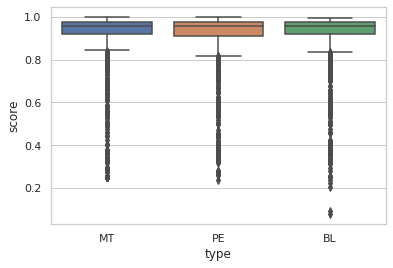

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="type", y="score", data=trans_pairs[trans_pairs['tgt'] != ''])
# ax.set(ylim=(0.6,1.2))
ax

In [17]:
# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Python implementation of BLEU and smooth-BLEU.
This module provides a Python implementation of BLEU and smooth-BLEU.
Smooth BLEU is computed following the method outlined in the paper:
Chin-Yew Lin, Franz Josef Och. ORANGE: a method for evaluating automatic
evaluation metrics for machine translation. COLING 2004.
"""

import collections
import math


def _get_ngrams(segment, max_order):
    """Extracts all n-grams upto a given maximum order from an input segment.
    Args:
        segment: text segment from which n-grams will be extracted.
        max_order: maximum length in tokens of the n-grams returned by this
            methods.
    Returns:
        The Counter containing all n-grams upto max_order in segment
        with a count of how many times each n-gram occurred.
    """
    ngram_counts = collections.Counter()
    for order in range(1, max_order + 1):
        for i in range(0, len(segment) - order + 1):
            ngram = tuple(segment[i:i+order])
            ngram_counts[ngram] += 1
    return ngram_counts


def compute_bleu(reference_corpus, translation_corpus, max_order=4, smooth=False):
    """Computes BLEU score of translated segments against one or more references.
    Args:
        reference_corpus: list of lists of references for each translation. Each
            reference should be tokenized into a list of tokens.
        translation_corpus: list of translations to score. Each translation
            should be tokenized into a list of tokens.
        max_order: Maximum n-gram order to use when computing BLEU score.
        smooth: Whether or not to apply Lin et al. 2004 smoothing.
    Returns:
        3-Tuple with the BLEU score, n-gram precisions, geometric mean of n-gram
        precisions and brevity penalty.
    """
    matches_by_order = [0] * max_order
    possible_matches_by_order = [0] * max_order
    reference_length = 0
    translation_length = 0
    for (references, translation) in zip(reference_corpus, translation_corpus):
        reference_length += min(len(r) for r in references)
        translation_length += len(translation)

        merged_ref_ngram_counts = collections.Counter()
        for reference in references:
            merged_ref_ngram_counts |= _get_ngrams(reference, max_order)
        translation_ngram_counts = _get_ngrams(translation, max_order)
        overlap = translation_ngram_counts & merged_ref_ngram_counts
        for ngram in overlap:
            matches_by_order[len(ngram)-1] += overlap[ngram]
        for order in range(1, max_order+1):
            possible_matches = len(translation) - order + 1
            if possible_matches > 0:
                possible_matches_by_order[order-1] += possible_matches

    precisions = [0] * max_order
    for i in range(0, max_order):
        if smooth:
            precisions[i] = ((matches_by_order[i] + 1.) / (possible_matches_by_order[i] + 1.))
        else:
            if possible_matches_by_order[i] > 0:
                precisions[i] = (float(matches_by_order[i]) / possible_matches_by_order[i])
            else:
                precisions[i] = 0.0

    if min(precisions) > 0:
        p_log_sum = sum((1. / max_order) * math.log(p) for p in precisions)
        geo_mean = math.exp(p_log_sum)
    else:
        geo_mean = 0

    ratio = float(translation_length) / reference_length

    if ratio > 1.0:
        bp = 1.
    else:
        bp = math.exp(1 - 1. / ratio)

    bleu = geo_mean * bp

    return (bleu, precisions, bp, ratio, translation_length, reference_length)

In [18]:
reference = [['No', '.'], ['No', ''], ['No', '.', ''], ['No'], ['No'], ['"No"'], ['No'], ['No'], ['no'], ['No'], ['no'], ['"No."'], ['NO!']]
test = ["No"]

compute_bleu(reference, test, max_order=1, smooth=True)[0]

1.0

In [19]:
# -*- coding:utf-8 -*-
from __future__ import division, print_function
""" Copyright (c) 2011 Hiroyuki Tanaka. All rights reserved."""
import itertools as itrt

import re
import unicodedata


def ter(inputwords, refwords):
    """Calcurate Translation Error Rate
    inputwords and refwords are both list object.
    >>> ref = 'SAUDI ARABIA denied THIS WEEK information published in the AMERICAN new york times'.split()
    >>> hyp = 'THIS WEEK THE SAUDIS denied information published in the new york times'.split()
    >>> '{0:.3f}'.format(ter(hyp, ref))
    '0.308'
    """
    inputwords, refwords = list(inputwords), list(refwords)
    ed = CachedEditDistance(refwords)
    return _ter(inputwords, refwords, ed)


def _ter(iwords, rwords, mtd):
    """ Translation Erorr Rate core function """
    err = 0
    # print('[I]', u' '.join(iwords))
    # print('[R]', u' '.join(rwords))
    # print('[ED]', mtd(iwords))
    while True:
        delta, new_iwords = _shift(iwords, rwords, mtd)
        # print('[I]', u' '.join(iwords))
        # print('[R]', u' '.join(rwords))
        # print('[ED]', mtd(iwords))
        if delta <= 0:
            break
        err += 1
        iwords = new_iwords
    return (err + mtd(iwords)) / len(rwords)


def _shift(iwords, rwords, mtd):
    """ Shift the phrase pair most reduce the edit_distance
    Return True shift occurred, else False.
    """
    pre_score = mtd(iwords)
    scores = []
    for isp, rsp, length in _findpairs(iwords, rwords):
        shifted_words = iwords[:isp] + iwords[isp + length:]
        shifted_words[rsp:rsp] = iwords[isp:isp + length]
        scores.append((pre_score - mtd(shifted_words), shifted_words))
    if not scores:
        return (0, iwords)
    scores.sort()
    return scores[-1]


def _findpairs(ws1, ws2):
    u""" yield the tuple of (ws1_start_point, ws2_start_point, length)
    So ws1[ws1_start_point:ws1_start_point+length] == ws2[ws2_start_point:ws2_start_point+length]
    """
    for i1, i2 in itrt.product(range(len(ws1)), range(len(ws2))):
        if i1 == i2:
            continue  # take away if there is already in the same position
        if ws1[i1] == ws2[i2]:
            # counting
            length = 1
            for j1, j2 in zip(range(i1 + 1, len(ws1)), range(i2 + 1, len(ws2))):
                if ws1[j1] == ws2[j2]:
                    length += 1
                else:
                    break
            yield (i1, i2, length)


def _gen_matrix(col_size, row_size, default=None):
    return [[default for _ in range(row_size)] for __ in range(col_size)]


def edit_distance(s, t):
    """It's same as the Levenshtein distance"""
    l = _gen_matrix(len(s) + 1, len(t) + 1, None)
    l[0] = [x for x, _ in enumerate(l[0])]
    for x, y in enumerate(l):
        y[0] = x
    for i, j in itrt.product(range(1, len(s) + 1), range(1, len(t) + 1)):
        l[i][j] = min(l[i - 1][j] + 1,l[i][j - 1] + 1,l[i - 1][j - 1] + (0 if s[i - 1] == t[j - 1] else 1))
    return l[-1][-1]


class CachedEditDistance(object):
    u""" 編集距離のキャッシュ版
    一回計算した途中結果を保存しておいて再利用する
    以前計算したリストをtrie木で保存して、重複する演算を省略する
    trieはネストした辞書で表現し、値に[次の辞書, キャッシュされた値]の長さ２のリストを用いる
    比較する対象はリスト化されている必要がある。
    """
    def __init__(self, rwords):
        self.rwds = rwords
        self._cache = {}
        self.list_for_copy = [0 for _ in range(len(self.rwds) + 1)]

    def __call__(self, iwords):
        start_position, cached_score = self._find_cache(iwords)
        score, newly_created_matrix = self._edit_distance(iwords, start_position, cached_score)
        self._add_cache(iwords, newly_created_matrix)  # もう一度たどって、キャッシュがないノードにキャッシュを挿入していく
        return score

    def _edit_distance(self, iwords, spos, cache):
        u""" sposが0の場合はキャッシュなし。
        """
        if cache is None:
            cache = [tuple(range(len(self.rwds) + 1))]
        else:
            cache = [cache] # 一つのrowにする
        l = cache + [list(self.list_for_copy) for _ in range(len(iwords) - spos)]
        # 先頭はキャッシュなので飛ばす。iwordsはsposから、lは1から計算
        assert len(l) - 1 == len(iwords) - spos
        for i, j in itrt.product(range(1, len(iwords) - spos + 1), range(len(self.rwds) + 1)):
            if j == 0:
                l[i][j] = l[i - 1][j] + 1
            else:
                l[i][j] = min(l[i - 1][j] + 1, l[i][j - 1] + 1, l[i - 1][j - 1] + (0 if iwords[spos + i - 1] == self.rwds[j - 1] else 1))
        return l[-1][-1], l[1:]

    def _add_cache(self, iwords, mat):
        node = self._cache
        skipnum = len(iwords) - len(mat)
        for i in range(skipnum):
            node = node[iwords[i]][0]
        assert len(iwords[skipnum:]) == len(mat)
        for word, row in zip(iwords[skipnum:], mat):
            if word not in node:
                node[word] = [{}, None]
            value = node[word]
            if value[1] is None:
                value[1] = tuple(row)
            node = value[0]  # nodeを一つ掘り下げる(drill down)

    def _find_cache(self, iwords):
        node = self._cache
        start_position, row = 0, None
        for idx, word in enumerate(iwords):
            if word in node:
                start_position = idx + 1
                node, row = node[word] # rowに値を入れておいて、
            else:
                break
        return start_position, row


def parse_args():
    import argparse             # new in Python 2.7!!
    parser = argparse.ArgumentParser(
        description='Translation Error Rate Evaluator',
        epilog="If you have an UnicodeEncodeError, try to set 'PYTHONIOENCODING' to your environment variables."
        )
    parser.add_argument('-r', '--ref', help='Reference file', required=True)
    parser.add_argument('-i', '--input', help='Input(test) file', required=True)
    parser.add_argument('-v', '--verbose', help='Show scores of each sentence.',
                        action='store_true', default=False)
    parser.add_argument('-l', '--lang', choices=['ja', 'en'], default='en', help='Language')
    parser.add_argument('--force-token-mode', action='store_true', default=False, help='Use a space separated word as a unit')
    return parser.parse_args()


def main():
    import codecs
    import sys
    import itertools
    import math
    args = parse_args()
    ilines = [util.preprocess(x, args.lang) for x in codecs.open(args.input, 'r', 'utf-8').readlines()]
    rlines = [util.preprocess(x, args.lang) for x in codecs.open(args.ref, 'r', 'utf-8').readlines()]
    if len(ilines) != len(rlines):
        print("Error: input file has {0} lines, but reference has {1} lines.".format(len(ilines), len(rlines)))
        sys.exit(1)
    scores = []
    for lineno, (rline, iline) in enumerate(itertools.izip(ilines, rlines), start=1):
        if args.force_token_mode:
            rline, iline = rline.split(), iline.split()
        else:
            rline, iline = util.split(rline, args.lang), util.split(iline, args.lang)
        # iline, rline are list object
        score = ter(iline, rline)
        scores.append(score)
        if args.verbose:
            print("Sentence {0}: {1:.4f}".format(lineno, score))
    average = sum(scores) / len(scores)
    variance = sum((x - average) ** 2 for x in scores) / len(scores)
    stddev = math.sqrt(variance)
    print("Average={0:.4f}, Variance={1:.4f}, Standard Deviatioin={2:.4f}".format(average, variance, stddev))


def preprocess_en(s):
    u"""
    記号類: 同じものは固まる、違うものは離す
    * 特殊な用法は経験ベースでくっつける
    例: e.g., a.m., p.m., etc.
    * 数字に挟まれたピリオドとカンマはくっつける
    文字 <=> a-zA-Z0-9
    記号 <=> 文字以外
    """
    s = s.rstrip()  # trail space, tab, newlineの削除
    s = re.sub(r'([^a-zA-Z0-9])(?!\1|$)', r'\1 ', s) # 前が記号で、後ろが出た文字以外
    s = re.sub(r'(?<=[a-zA-Z0-9])([^a-zA-Z0-9])', r' \1', s) # 後ろが記号で、前が記号以外
    s = re.sub(r'\s+', r' ', s)  # スペースの個数正規化
    s = re.sub(r'(\d) ([.,]) (\d)', r'\1\2\3', s)  # 0 . 1 -> 0.1
    s = re.sub(r'(Dr|Jr|Prof|Rev|Gen|Mr|Mt|Mrs|Ms) .', r'\1.', s)  # Mr . -> Mr.
    s = s.replace(u'e . g .', u'e.g.')
    s = s.replace(u'i . e .', u'e.g.')
    s = s.replace(u'U . S .', u'U.S.')
    return s

def preprocess_ja(s):
    s = s.rstrip()  # trail space, tab, newlineの削除
    s = unicodedata.normalize('NFKC', s)  # まず正規化
    return s


def preprocess(s, lang):
    funcname = 'preprocess_{0}'.format(lang)
    return globals()[funcname](s)


def split(s, lang):
    if lang == 'ja':
        return list(s)
    else:
        return s.split()

In [20]:
ref = 'SAUDI ARABIA denied THIS WEEK information published in the AMERICAN new york times'.split()
hyp = 'THIS WEEK THE SAUDIS denied information published in the new york times'.split()
'{0:.3f}'.format(ter(hyp, ref))

'0.308'

In [21]:
trans_pairs.fillna('', inplace=True)
trans_pairs = trans_pairs[trans_pairs['direction'] == 'Hindi -> English']

In [22]:
for j in range(1,5):
    for index, row in trans_pairs.iterrows():
        src = row["src"]
        tgt = row["tgt"]
        collect = trans_pairs[trans_pairs['src'] == src]
        refs = []
        if row["tgt"] != '':
            for ind, ro in collect.iterrows():
                if ro["tgt"] != '':
                    refs.append(ro["tgt"].strip().split(" "))
            trans_pairs.at[index,'bleu-' + str(j)] = compute_bleu(refs, tgt.split(" "), max_order=j, smooth=True)[0]
        else:
            trans_pairs.at[index,'bleu-' + str(j)] = 0.0

In [ ]:
for index, row in trans_pairs.iterrows():
        src = row["src"]
        tgt = row["tgt"]
        collect = trans_pairs[trans_pairs['src'] == src]
        refs = []
        if row["tgt"] != '':
            for ind, ro in collect.iterrows():
                if ro["tgt"] != '':
                    refs.append(ro["tgt"].strip().split(" "))
            trans_pairs.at[index,'bleu-' + str(j)] = compute_bleu(refs, tgt.split(" "), max_order=j, smooth=True)[0]
        else:
            trans_pairs.at[index,'bleu-' + str(j)] = 0.0

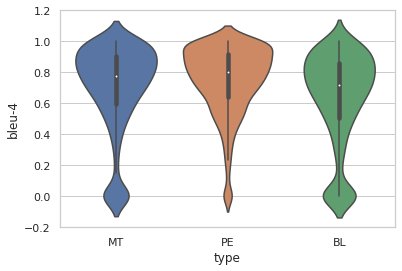

In [71]:
import seaborn as sns
sns.set(style="whitegrid")
sns.violinplot(x="type", y="bleu-4", data=trans_pairs)

In [72]:
# import seaborn as sns
# sns.set(style="whitegrid")
# sns.violinplot(x="level", y="bleu-4", hue="type", data=trans_pairs[trans_pairs['tgt'] != ''])

In [66]:
trans_pairs.groupby(['level','type']).mean().round(2)

score  bleu-1  bleu-2  bleu-3  bleu-4
level type                                       
L1    BL     0.82    0.77    0.71    0.67    0.65
      MT     0.96    0.92    0.86    0.83    0.81
      PE     0.96    0.92    0.86    0.82    0.80
L2    BL     0.80    0.74    0.66    0.63    0.60
      MT     0.87    0.80    0.75    0.72    0.70
      PE     0.92    0.87    0.81    0.78    0.76
L3    BL     0.78    0.75    0.68    0.64    0.61
      MT     0.84    0.81    0.75    0.71    0.69
      PE     0.93    0.90    0.83    0.79    0.77
L4    BL     0.87    0.82    0.74    0.69    0.66
      MT     0.80    0.77    0.70    0.67    0.64
      PE     0.88    0.83    0.76    0.73    0.70

In [41]:
trans_pairs.groupby(['level','type']).mean().round(2)

score  bleu-1  bleu-2  bleu-3  bleu-4
level type                                       
L1    BL     0.82    0.77    0.70    0.65    0.60
      MT     0.96    0.92    0.85    0.82    0.78
      PE     0.96    0.91    0.85    0.81    0.77
L2    BL     0.80    0.73    0.64    0.59    0.55
      MT     0.87    0.80    0.74    0.69    0.66
      PE     0.92    0.86    0.79    0.73    0.70
L3    BL     0.78    0.74    0.67    0.63    0.59
      MT     0.84    0.80    0.74    0.70    0.67
      PE     0.93    0.90    0.82    0.77    0.74
L4    BL     0.87    0.81    0.72    0.67    0.61
      MT     0.80    0.76    0.69    0.65    0.61
      PE     0.88    0.83    0.75    0.70    0.66

In [43]:
nonblankdf = trans_pairs[trans_pairs['tgt'] != ''].groupby(['level','type']).count()
totaldf = trans_pairs.groupby(['level','type']).count()
nonblankdf.divide(totaldf)

id  translatedSet       src       tgt      user     story  \
level type                                                                    
L1    BL    0.861004       0.861004  0.861004  0.861004  0.861004  0.861004   
      MT    1.000000       1.000000  1.000000  1.000000  1.000000  1.000000   
      PE    1.000000       1.000000  1.000000  1.000000  1.000000  1.000000   
L2    BL    0.876543       0.876543  0.876543  0.876543  0.876543  0.876543   
      MT    0.930168       0.930168  0.930168  0.930168  0.930168  0.930168   
      PE    1.000000       1.000000  1.000000  1.000000  1.000000  1.000000   
L3    BL    0.823224       0.823224  0.823224  0.823224  0.823224  0.823224   
      MT    0.897924       0.897924  0.897924  0.897924  0.897924  0.897924   
      PE    1.000000       1.000000  1.000000  1.000000  1.000000  1.000000   
L4    BL    0.911828       0.911828  0.911828  0.911828  0.911828  0.911828   
      MT    0.844794       0.844794  0.844794  0.844794  0.844794  0.844794   
      PE    0.919450       0.919450  0.919450  0.919450  0.919450  0.919450   

            direction     score    bleu-1    bleu-2    bleu-3    bleu-4  
level type                                                               
L1    BL     0.861004  0.861004  0.861004  0.861004  0.861004  0.861004  
      MT     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
      PE     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
L2    BL     0.876543  0.876543  0.876543  0.876543  0.876543  0.876543  
      MT     0.930168  0.930168  0.930168  0.930168  0.930168  0.930168  
      PE     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
L3    BL     0.823224  0.823224  0.823224  0.823224  0.823224  0.823224  
      MT     0.897924  0.897924  0.897924  0.897924  0.897924  0.897924  
      PE     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
L4    BL     0.911828  0.911828  0.911828  0.911828  0.911828  0.911828  
      MT     0.844794  0.844794  0.844794  0.844794  0.844794  0.844794  
      PE     0.919450  0.919450  0.919450  0.919450  0.919450  0.919450

In [84]:
trans_pairs[(trans_pairs['user'].str.contains('User 1101')) & trans_pairs['story'].str.contains('Under My Bed')]

,id,translatedSet,src,tgt,user,type,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
2693,8632,Test User 1101 | Under My Bed MT L2 | Hindi ->...,मेरी आँख खुली,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2694,8631,Test User 1101 | Under My Bed MT L2 | Hindi ->...,मुझे प्यास लगी थी,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2695,8630,Test User 1101 | Under My Bed MT L2 | Hindi ->...,पानी लाने के लिए मैंने अपनी चप्पल ढूँढी,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2696,8629,Test User 1101 | Under My Bed MT L2 | Hindi ->...,हाय,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2697,8628,Test User 1101 | Under My Bed MT L2 | Hindi ->...,मेरे पलंग के नीचे शेर है,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2698,8627,Test User 1101 | Under My Bed MT L2 | Hindi ->...,अब क्या करूँ,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2699,8626,Test User 1101 | Under My Bed MT L2 | Hindi ->...,माँ को बुलाऊँ,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2700,8625,Test User 1101 | Under My Bed MT L2 | Hindi ->...,कहीं शेर दहाड़ने लगा तो,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2701,8624,Test User 1101 | Under My Bed MT L2 | Hindi ->...,फिर से सो जाऊँ,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0
2702,8623,Test User 1101 | Under My Bed MT L2 | Hindi ->...,मगर नींद नहीं आती,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,0.0,0.0,0.0,0.0,0.0


In [89]:
len(trans_pairs[trans_pairs['level'].str.contains('L4')])

1483